# Part I - Prosper Loan Data
## by Assem Alshaya

## Introduction

> This dataset contains loans and 81 variables. it provides all the information about each loan with an unique key.

## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

> Loading the dataset that was imported from Udacity resources and downloaded manually 

In [4]:
df1 = pd.read_csv("prosperLoanData.csv")
df1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


###  Understanding the Dataset

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df1.shape

(113937, 81)

In [7]:
df1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> a CSV file with 81 columns

### What is/are the main feature(s) of interest in your dataset?

> I am intersted in exploring the system of rating based on employment type , also if the investors number affect the amount of the loan, which loans we have in general , what is the monthly income of our clients and did we give a lot of money to people that failed to pay on time compared to completed loans on time

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> employment type , the loan amount , monthly income ,  ProsperRating (Alpha) , number of investors and statues of loans

In [8]:
target_columns =  ['Recommendations', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'StatedMonthlyIncome', 'DelinquenciesLast7Years', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Term', 'Investors']

we don't need the 81 variables , so I chose what I need to do my analysis

In [9]:
df2 = df1[target_columns]
df2.head()

,Recommendations,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Term,Investors
0,0,Completed,0.1580,NaN,0,Self-employed,3083.333333,4.0,NaN,9425,2007-09-12 00:00:00,36,258
1,0,Current,0.0920,A,2,Employed,6125.000000,0.0,NaN,10000,2014-03-03 00:00:00,36,1
2,0,Completed,0.2750,NaN,0,Not available,2083.333333,0.0,NaN,3001,2007-01-17 00:00:00,36,41
3,0,Current,0.0974,A,16,Employed,2875.000000,14.0,NaN,10000,2012-11-01 00:00:00,36,158
4,0,Current,0.2085,D,2,Employed,9583.333333,0.0,1.0,15000,2013-09-20 00:00:00,36,20


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Recommendations            113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   StatedMonthlyIncome        113937 non-null  float64
 7   DelinquenciesLast7Years    112947 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Term                       113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

we have null values and we have data column as 'Object'

In [11]:
df2 = df2.dropna(subset=['ProsperRating (Alpha)']).reset_index()

fix the null issues by dropping them, it's because our data is until 2009

In [12]:
df2['LoanOriginationDate'] = pd.to_datetime(df2['LoanOriginationDate'])

to convert the column to date

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Recommendations            84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   DelinquenciesLast7Years    84853 non-null  float64       
 9   TotalProsperLoans          19797 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Term

In [14]:
df2['TotalProsperLoans'] = df2['TotalProsperLoans'].fillna(0)

since they don't have loans we fill them with 0 not null

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Recommendations            84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   DelinquenciesLast7Years    84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Term

In [16]:
df2.head()

,index,Recommendations,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Term,Investors
0,1,0,Current,0.0920,A,2,Employed,6125.000000,0.0,0.0,10000,2014-03-03,36,1
1,3,0,Current,0.0974,A,16,Employed,2875.000000,14.0,0.0,10000,2012-11-01,36,158
2,4,0,Current,0.2085,D,2,Employed,9583.333333,0.0,1.0,15000,2013-09-20,36,20
3,5,0,Current,0.1314,B,1,Employed,8333.333333,0.0,0.0,15000,2013-12-24,60,1
4,6,0,Current,0.2712,E,1,Employed,2083.333333,0.0,0.0,3000,2013-04-18,36,1


In [17]:
# a loop to go for every row
for n, row in df2.iterrows():
    # if it is 'Chargedoff'
    if df2.at[n, 'LoanStatus'] == 'Chargedoff':
        df2.at[n, 'LoanStatus'] = 'Defaulted'
#check if it is implemented
df2[df2['LoanStatus'] == 'Chargedoff']

,index,Recommendations,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Term,Investors


Charged off means that the borrower has closed the account or had a loss so we will assign it as defaulted

In [21]:
#to put labels and title since we have lots of charts
def lab_axis (x_label , y_label , title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [26]:
#to fix the order of the loan status
rating3 = ['Current' , 'Completed' , 'FinalPaymentProgress' , 'PastDue(1-15 days)' , 'PastDue(16-30 days)' , 'PastDue(31-60 days)' , 'PastDue(61-90 days)'
          'PastDue(91-120 days)' , 'PastDue(>120 days)' , 'Chargedoff' , 'Default']
ratingclass2 = pd.CategoricalDtype(ordered=True, categories=rating3)
df2['LoanStatus'] = df2['LoanStatus'].astype(ratingclass2);

## Univariate Exploration


firstly we will look at the status ( employee status & loan status) to see where we stand

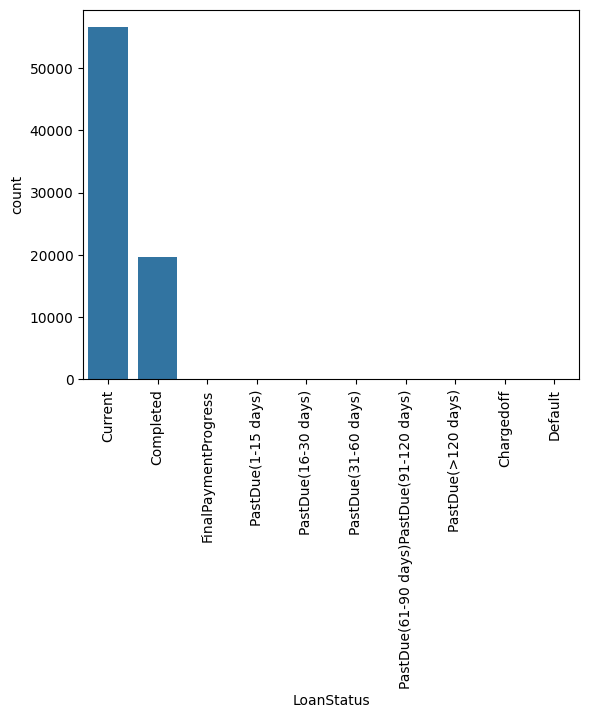

In [27]:
sns.countplot(data = df2, x = 'LoanStatus', color = sns.color_palette()[0]);
# to see all the ticks
plt.xticks(rotation=90);

we clearly see that most of the loans are current and the borrowers are completing the loans most of the time rather than letting it past due

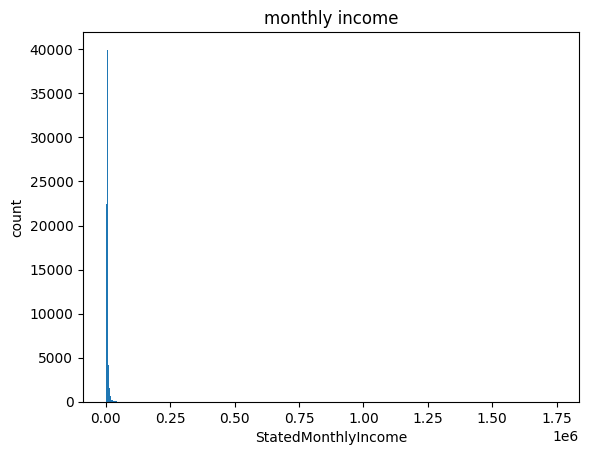

In [28]:
plt.hist(data=df2, x='StatedMonthlyIncome', bins=500);
lab_axis('StatedMonthlyIncome' , 'count' , 'monthly income')

the distribution is skewed to the right so I have to get a closer look

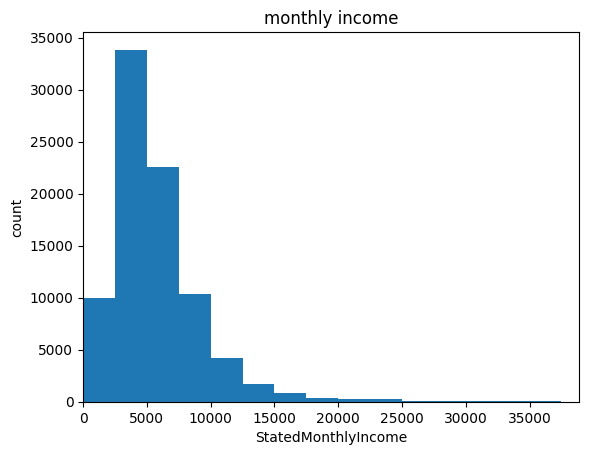

In [24]:
#setting a limit to look closer
threshold = df2['StatedMonthlyIncome'].mean() + df2['StatedMonthlyIncome'].std()*4;
plt.hist(data=df2, x='StatedMonthlyIncome', bins=700);
# set the limit
plt.xlim(0,threshold);
lab_axis('StatedMonthlyIncome' , 'count' , 'monthly income')

the distrinution is confirmed to be right skewed and the mode is around 5000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Firstly , we looked at the loan status to see if there is something to be worry about but everything seems good as most of the loans are current and completed. Secondly, we found that the distribution of the monthly income is right skewed and it is reasonable since it represents the real world with fewer the fewer people that are rich and we don't have -ve income , so we looked closer to find that most people's income are around 5000 , we are intrested in mode and not mean because the mean will give us no clue due to the high effect of the outliers income

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we have set a threshold as mean + std*4 , to get a closer look and use it as a limits on the plot , and still we have right skewed. the reason of putting a threshold is to standardize the data 

## Bivariate Exploration


to fix the rating system

In [ ]:
#to fix the rating and assign it to the ProsperRating (Alpha) column
rating = ['AA' , 'A' , 'B' , 'C' , 'D' , 'E' , 'HR']
ratingclass = pd.CategoricalDtype(ordered=True, categories=rating)
df2['ProsperRating (Alpha)'] = df2['ProsperRating (Alpha)'].astype(ratingclass);

In [ ]:
#we chose a sample from the data
sample = df2.sample(45)
#we want to see loans with muiltible investors
sample = sample[sample['Investors'] > 1]
plt.scatter(data = sample , x = 'Investors' , y = 'LoanOriginalAmount' );
lab_axis('investors' , 'loan amount' , 'Investors Vs Loan amount')

we can see a +ve correlation between the amount and how many invetors 

In [ ]:
# we only intersted of complete vs defaulted
df3 = df2[(df2['LoanStatus'] == 'Completed') | (df2['LoanStatus'] == 'Defaulted')]
sns.boxplot(data = df3, x = 'LoanStatus', y = 'LoanOriginalAmount', color=sns.color_palette()[0]);

we can notice that people that are failing to pay on time have less amount of loans and that indicates that the bank gives high amount to people that are able to pay on time , so we conclude that the requirements for the amount limits are working for the bank and the system is pretty good

In [ ]:
sns.countplot(data = df2, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus');

we can see the lower ratings have more people that are Self-employed , other and not-employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we noticed a +ve correlation between the loan amount the how many investors. <br> <br>
> we believe that the bank system of lending money is stable by observing that there is less money lent to people that fail to pay on time <br> <br>
>we concluded that the rating system is effective by observing that the lower job security the lower rating assigned

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> most loans that have more than one investor has a range of 2 to 200 

## Multivariate Exploration


In [ ]:
sns.boxplot(data=df3, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

except for 'HR' rating , most defaulted loans have more loan amount mean than completed loans

In [ ]:
# we only considering some categories and the rest are 'others'
categories = {1: 'Debt Consolidation', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 7: 'Other'}
for n, row in df2.iterrows():
    if df2.at[n, 'ListingCategory (numeric)'] in categories:
        df2.at[n, 'ListingCategory (numeric)'] = categories[df2.at[n, 'ListingCategory (numeric)']]
    else:
        df2.at[n, 'ListingCategory (numeric)'] = 'Others'

to play with our alternative dataframe and reduce the listing categories 

In [ ]:
sns.violinplot(data=df3, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

business category tend to has more credit of the loans <br> <br>
maximum amount of money that has a student use defaulted loan is around 10k 


In [ ]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df3, kind = 'count', col_wrap = 3);

a lot of completed loans happening in the debt consolidation chart <br> <br>
the defaulted loans almost in every category is skewed to the left

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
previously when we plotted deafualted vs completed loans , based on the plot we saw that we have more completed loans than defaulted loans and we conculded that we are in the safe side , but when we plotted the breakdown , we noticed that almost every category we have more money in the defaulted loans than completed , so we are no in the safe side since most pf the money are in loans that are not payed on time


### Were there any interesting or surprising interactions between features?
more defaulted credit on average than completed , business has the most amount of credit and most loans are in the debt consolidation

## Conclusions
- The more investors , the higher the credit of the loan <br> <br> 
- in almost each listing category we have higher centerlized credit in defaulted <br> <br> 
- regarding credit , on average it's located in completed loans more <br> <br> 
- most clients have a monthly income in this range [5000 , 10000]<br> <br> 
- most loans are current , completed and defaulted <br> <br> 
- the defaulted loans almost in every category is getting more towards worse rating <br> <br> 
- more loans are in debt consolidation <br> <br> 
- business has the most amount of credit <br> <br> 
- people with worse rating has less job security 